# 決策樹回歸(Decision Tree Regressor)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt

# Plot Decision Line

In [2]:
def plot_line(x_split,y_left_mean,y_right_mean,x_lim,sel):
    # x_split:分割線
    # y_left_mean：分割線縱軸的最小值
    # y_right_mean：分割線縱軸的最大值
    # xlim:分割線的橫軸邊界
    
    # sel=0-->當subtree左右兩邊都已經剩下一筆資料，或是到達所限制的最大層數
    if(sel==0):
        plt.plot([x_split,x_split],[y_left_mean,y_right_mean],'k',linewidth=6)
        plt.plot([x_lim[0],x_split],[y_left_mean,y_left_mean],'k',linewidth=6)
        plt.plot([x_split,x_lim[1]],[y_right_mean,y_right_mean],'k',linewidth=6)
    # sel=1-->當subtree建立時
    elif(sel==1):
        plt.plot([x_split,x_split],[y_left_mean,y_right_mean],'k',linewidth=6)
    # sel=2-->當右邊的subtree只剩下一筆資料
    elif(sel==2):
        plt.plot([x_split,x_lim[1]],[y_right_mean,y_right_mean],'k',linewidth=6)
    # sel=2-->當左邊的subtree只剩下一筆資料
    elif(sel==3):
        plt.plot([x_lim[0],x_split],[y_left_mean,y_left_mean],'k',linewidth=6)

# Mean Square Error

In [3]:
def MSE(s,y):
    # 這個方程式對應到文章中的Mean Square Error
    # s:subtree裡面所有的index
    com=sum((y[s]-np.mean(y[s]))**2)
    return com

# Decision Stump

In [4]:
def Decision_Stump(x,y):
    # 存放impurity候選值
    impurity=np.zeros(len(y)-1)
    # 對x排序
    x_sort=np.sort(x)
    # 儲存排序後x的index
    x_sort_index=np.argsort(x)
    # 計算每一種切割方式的impurity值
    for i in range(1,len(y)):
        s_left,s_right=x_sort_index[:i],x_sort_index[i:]
        impurity[i-1]=(len(s_left)/len(y))*MSE(s_left,y)+(len(s_right)/len(y))*MSE(s_right,y)
    x_split=(x_sort[np.argmin(impurity)]+x_sort[np.argmin(impurity)+1])/2
    # 回傳分割值和impurity值
    return x_split,min(impurity)

# Decision Tree Algorithms

In [5]:
def Decision_Tree(x,y,max_depth,x_lim):
    # 執行decision_stump找出最佳分割線
    x_split,impurity=Decision_Stump(x,y)
    # 切分我們的數據，這裡可以對應到b(x)
    p=x<x_split
    # 建立左邊和右邊的subtree
    x_left,y_left=x[p],y[p]
    x_right,y_right=x[~p],y[~p]
    # 建立我們畫回歸線的區間
    x_lim_left=np.zeros(2)
    x_lim_right=np.zeros(2)
    x_lim_left[0],x_lim_left[1]=x_lim[0],x_split
    x_lim_right[0],x_lim_right[1]=x_split,x_lim[1]
    # 檢查左右兩邊subtree是否只剩下一筆
    check_left,check_right=False,False
    if(len(y_left)==1):
        check_left=True
    if(len(y_right)==1):
        check_right=True
    # decision tree 停止條件
    # 1. impirity=0 / 2. 達到最大深度 / 3.左右兩邊都只剩下一筆資料
    if((impurity==0)or(max_depth==0)or((check_left)and(check_right))):
        plot_line(x_split,np.mean(y_left),np.mean(y_right),x_lim,0)
        return np.mean(y_left),np.mean(y_right)
    # 左邊分類好的話，就只延伸右邊的subtree
    elif(check_left):
        max_depth-=1
        right_y_left,right_y_right=Decision_Tree(x_right,y_right,max_depth,x_lim_right)
        plot_line(x_split,np.mean(y_left),right_y_left,x_lim,1)
        plot_line(x_split,np.mean(y_left),right_y_left,x_lim,3)
        return np.mean(y_left),right_y_right
    # 右邊分類好的話，就只延伸左邊的subtree
    elif(check_right):
        max_depth-=1
        left_y_left,left_y_right=Decision_Tree(x_left,y_left,max_depth,x_lim_left)
        plot_line(x_split,left_y_right,np.mean(y_right),x_lim,1)
        plot_line(x_split,left_y_right,np.mean(y_right),x_lim,2)
        return left_y_left,np.mean(y_right)
    # 兩邊的subtree都延伸
    else:
        max_depth-=1
        left_y_left,left_y_right=Decision_Tree(x_left,y_left,max_depth,x_lim_left)
        right_y_left,right_y_right=Decision_Tree(x_right,y_right,max_depth,x_lim_right)
        plot_line(x_split,left_y_right,right_y_left,x_lim,1)
        return left_y_left,right_y_right

# 多項式回歸

In [6]:
# p0~p9代表0次到9次方
p9,p8,p7,p6,p5,p4,p3,p2,p1,p0=1,3,5,7,9,-10,-8,-6,-4,-2
x=np.zeros(100)
y=np.zeros(100)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()
power=[p9,p8,p7,p6,p5,p4,p3,p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)

# Visualize

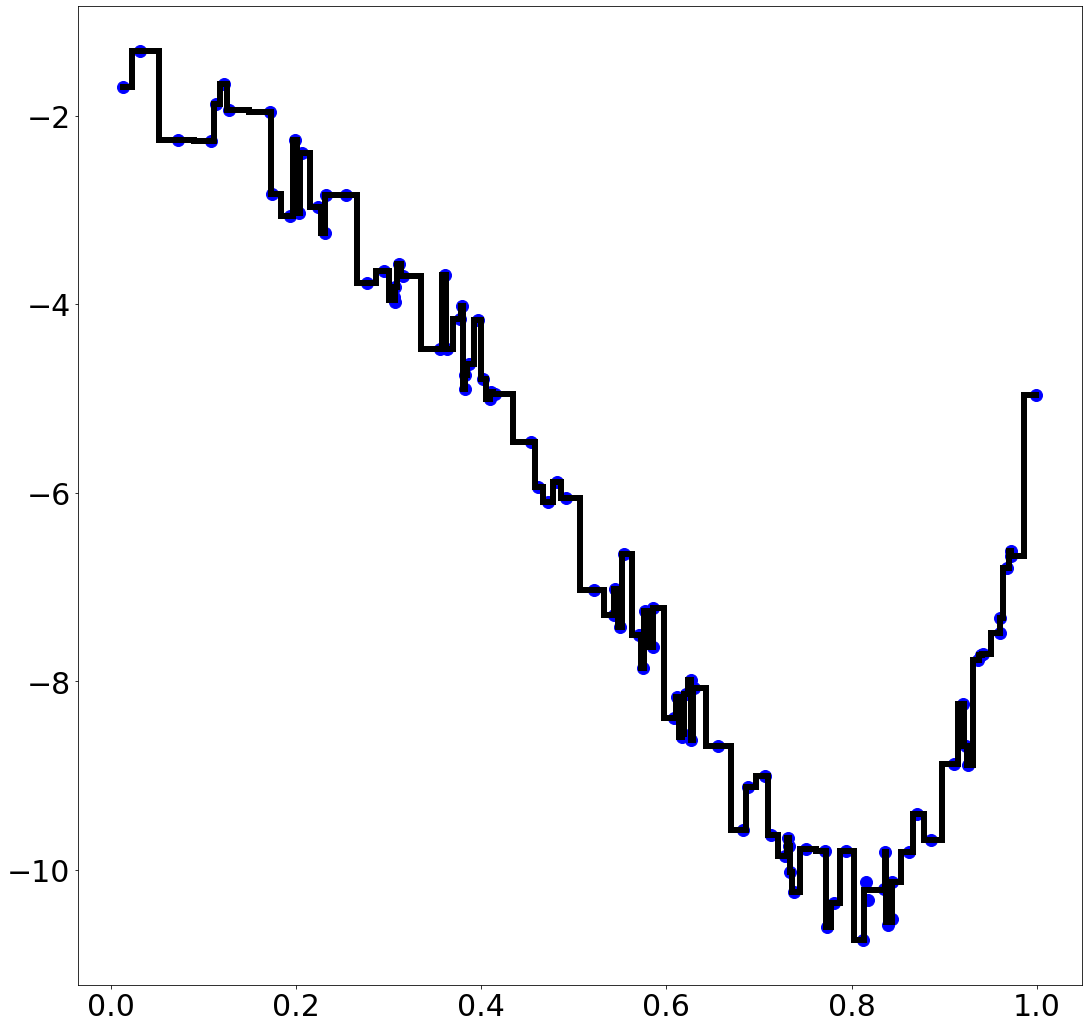

In [7]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"bo",markersize=12)
x_lim=np.zeros(2)
x_lim[0],x_lim[1]=min(x),max(x)
L,R=Decision_Tree(x,y,7,x_lim)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Sin and Cos function

In [8]:
# p0~p9代表0次到9次方
p2,p1,p0=1,2,3
x=np.zeros(200)
y=np.zeros(200)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*0.5
power=[p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)
y+=np.sin(x*50)

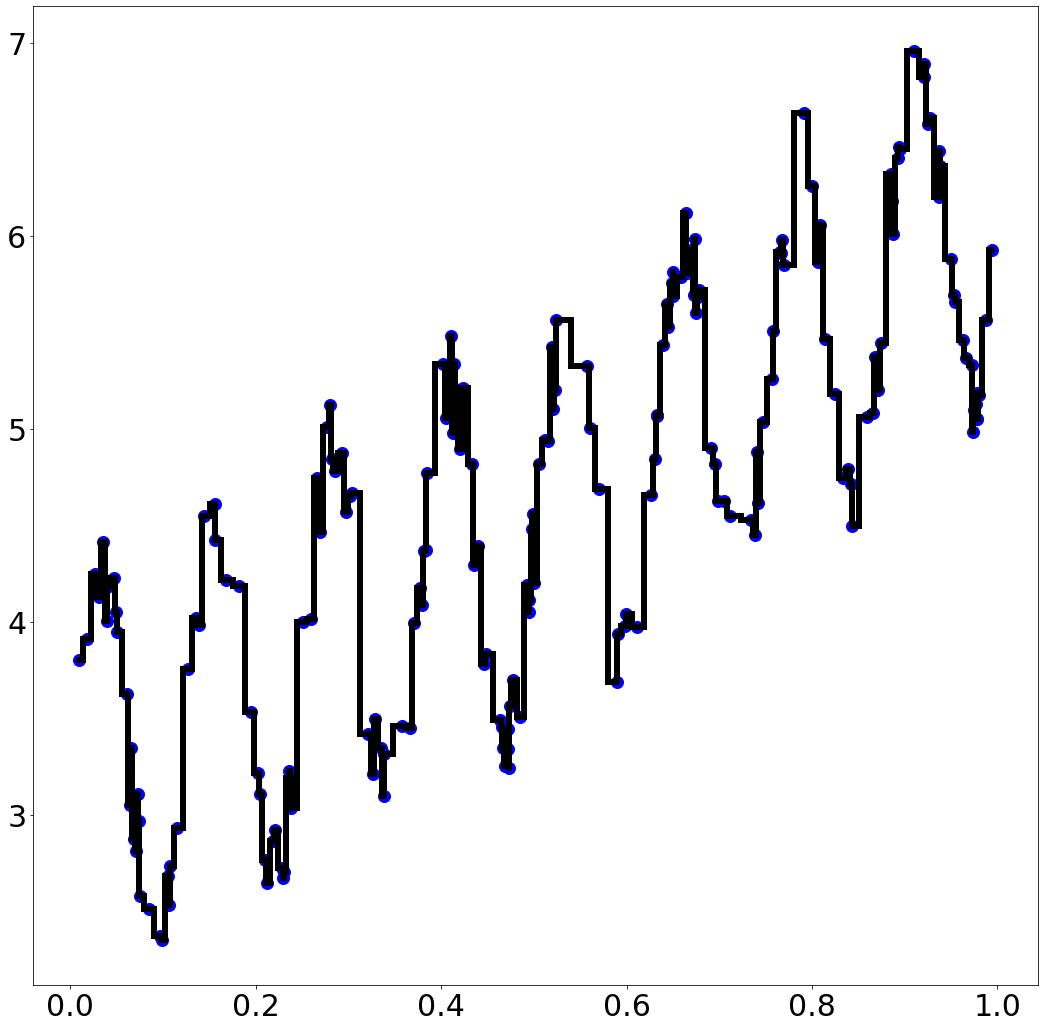

In [9]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"bo",markersize=12)
x_lim=np.zeros(2)
x_lim[0],x_lim[1]=min(x),max(x)
L,R=Decision_Tree(x,y,10,x_lim)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Polynomial Kernel

In [10]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    return (zeta+gamma*np.outer(x,xx))**power

# Kernel Ridge Regression

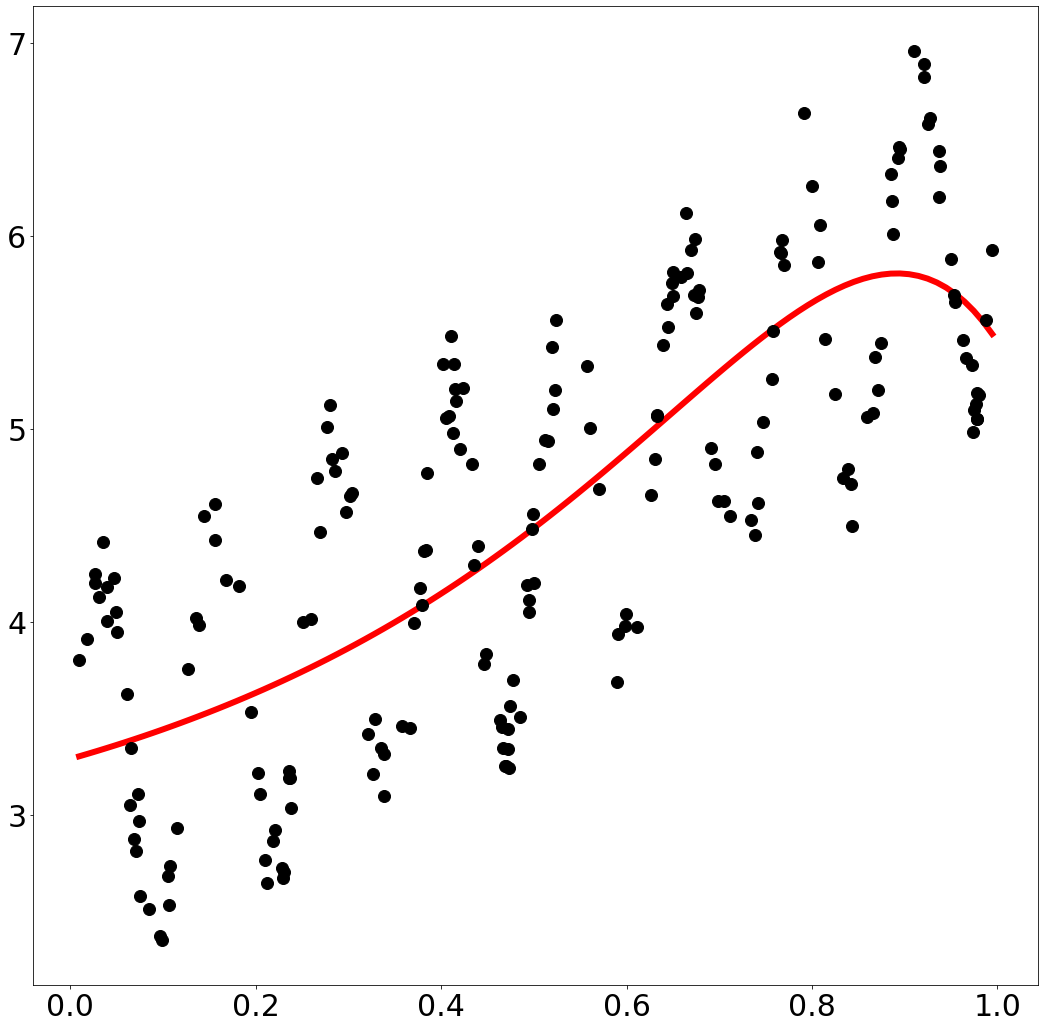

In [11]:
N=200
# c為次方數
c=9
# Polynomail Kernel 參數
gamma=1
zeta=1
# Regularization參數
lambda_2=1
# Kernel Trick
K=Polynomial_kernel(x,x,c,gamma,zeta)
# 計算alpha，可比對公式
a=np.dot(np.linalg.inv(lambda_2*np.diag(np.ones(N))+K),y)
# 建立回歸線數據點
x_plot=np.linspace(min(x),max(x),100)
K_plot=Polynomial_kernel(x_plot,x,c,gamma,zeta)
y_pred_krr=np.dot(K_plot,a)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x_plot,y_pred_krr,"r-",linewidth=6)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Decision Tree Regressor vs Kernel Ridge Regression

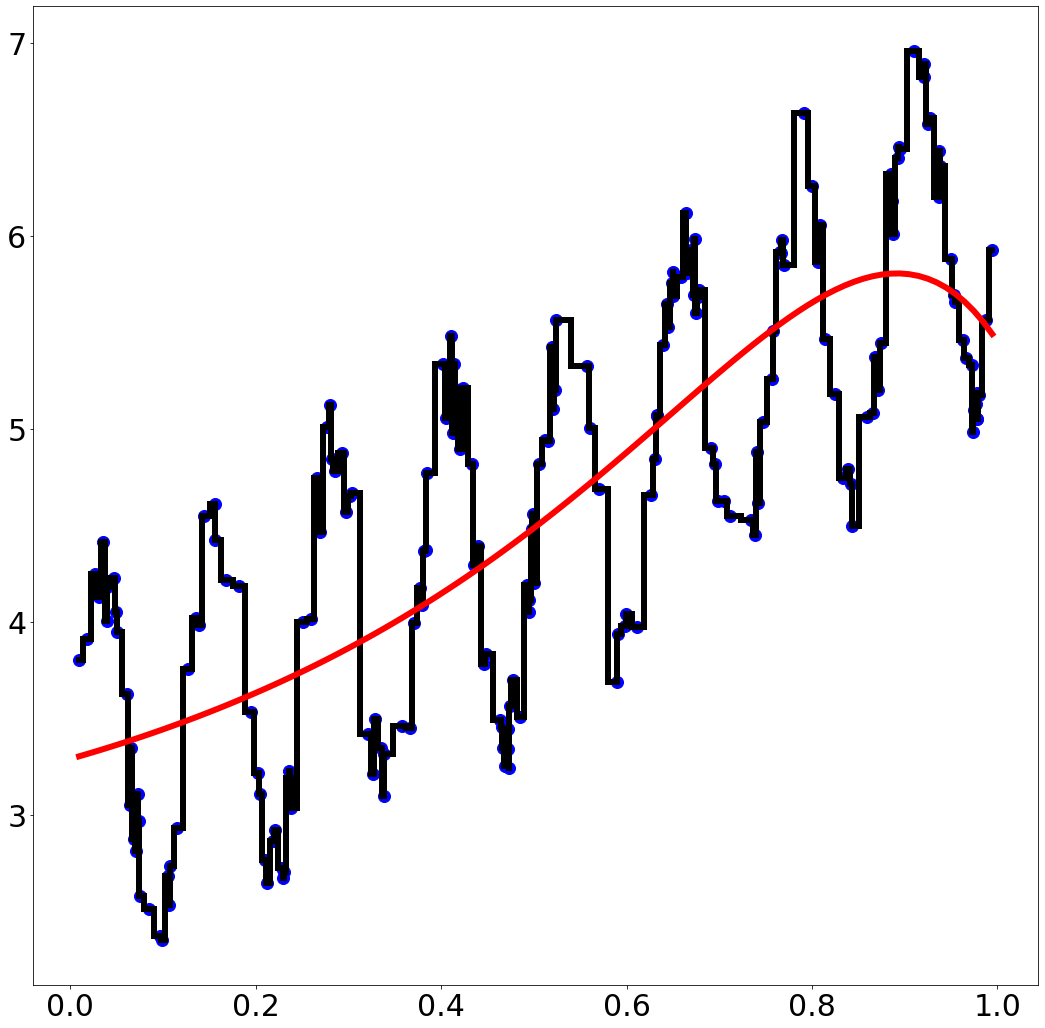

In [12]:
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"bo",markersize=12)
x_lim=np.zeros(2)
x_lim[0],x_lim[1]=min(x),max(x)
L,R=Decision_Tree(x,y,10,x_lim)
plt.plot(x_plot,y_pred_krr,"r-",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()